In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from importlib import reload

In [3]:
import visa
import drivers

In [4]:
def get_vna_trace(vna, amp=True):
    vna.prepare_for_stb()
    vna.sweep_single()
    vna.wait_for_stb()
    return vna.get_frequencies(), 20*log10(vna.get_tracedata()[0]) if amp  \
                    else unwrap(pna_l.get_tracedata()[1])+(pna_l.get_frequencies()-pna_l.get_frequencies()[0])*59.3e-9

## Keithley K2400 source meter

In [1]:
from drivers.k2400 import K2400

In [2]:
curr = K2400("k2400")

In [3]:
curr.set_mode("CURR")

In [4]:
curr.get_mode()

'CURR'

In [5]:
curr.get_current()

1e-05

In [11]:
curr.set_current(10e-6)

In [9]:
curr.set_voltage_compliance(2)

In [10]:
curr.get_voltage_compliance()

'2.000000E+00'

In [13]:
curr.output_off()

## Agilent E8257D

In [3]:
mw_src = E8257D("MXG")

In [4]:
mw_src.set_frequency(5e9)

In [5]:
mw_src.get_frequency()

5000000000.0

In [7]:
mw_src.set_output_state("ON")

In [32]:
mw_src.get_output_state()

'1\n'

In [36]:
mw_src.set_power(10)

##  PNA-L

In [39]:
reload(drivers.Agilent_PNA_L)
from drivers.Agilent_PNA_L import Agilent_PNA_L

In [40]:
pna_l = Agilent_PNA_L("PNA-L2")

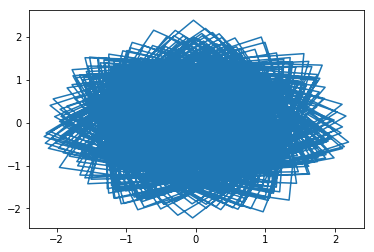

In [9]:
plt.plot(real(pna_l.get_sdata()), imag(pna_l.get_sdata()))

In [41]:
pna_l.get_parameters()

{'averages': 1,
 'bandwidth': 5000.0,
 'freq_limits': (2000000000.0, 10000000000.0),
 'nop': 2001,
 'power': -40.0,
 'sweep_type': 'LIN'}

In [38]:
pna_l.get_sweep_type()

'LIN'

In [33]:
pna_l.set_bandwidth(500)

True

In [34]:
pna_l.set_averages(10)

True

In [35]:
pna_l._visainstrument.query("sens:swe:gro:coun?")

'+10\n'

In [36]:
pna_l._visainstrument.query("sens:swe:mode?")

'HOLD\n'

In [37]:
pna_l.avg_clear()
pna_l.prepare_for_stb()
pna_l.sweep_single()
pna_l.wait_for_stb()

##  Keysight AWG + VNA

In [45]:
#reload(drivers.KeysightAWG)
from drivers.KeysightAWG import KeysightAWG, WaveformType
reload(drivers.Agilent_PNA_L)
from drivers.Agilent_PNA_L import Agilent_PNA_L

In [48]:
awg = KeysightAWG("AWG2")
#pna_l = Agilent_PNA_L("PNA-L", "PNA-L-2")

In [84]:
pna_l.get_electrical_delay()

6.9776861012e-08

In [113]:
pna_l.set_xlim(4.5e9, 9e9)
pna_l.set_nop(1000)

True

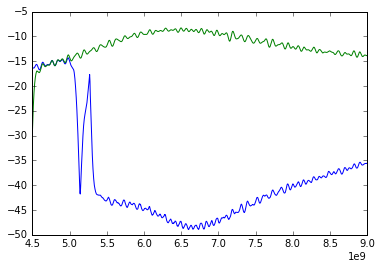

In [114]:
awg.apply_waveform(WaveformType.dc,0,0,0,2)
plt.plot(*get_vna_trace(pna_l))
awg.apply_waveform(WaveformType.dc,0,0,1,2)
plt.plot(*get_vna_trace(pna_l))

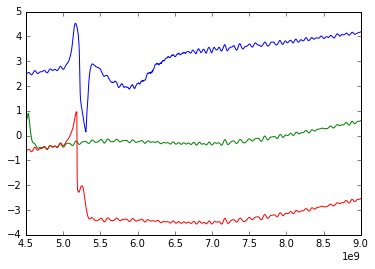

In [109]:
awg.apply_waveform(WaveformType.dc,0,0,0,2)
plt.plot(*get_vna_trace(pna_l, False))
awg.apply_waveform(WaveformType.dc,0,0,1,2)
plt.plot(*get_vna_trace(pna_l, False))
awg.apply_waveform(WaveformType.dc,0,0,-1,2)
plt.plot(*get_vna_trace(pna_l, False))

## Keysight EXA

In [393]:
reload(drivers.Agilent_EXA)
from drivers.Agilent_EXA import *

In [394]:
exa = Agilent_EXA_N9010A("EXA", "EXA")

In [30]:
exa.set_bandwidth(10e3)

True

In [46]:
exa.set_span(0)

True

In [50]:
exa.sweep_single()

In [108]:
exa.set_averages(101)

True

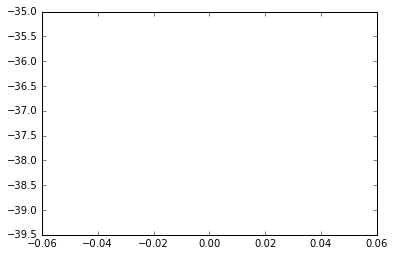

In [374]:
exa.prepare_for_stb()
exa.sweep_single()
exa.wait_for_stb()

plt.plot(exa.get_tracedata())

In [448]:
exa.setup_list_sweep([4.9e9, 5e9, 5.1e9], [1e3]*3)

In [464]:
exa.set_averages(1000)

True

In [465]:
exa.get_averages()

1

In [462]:
exa.prepare_for_stb()
exa.sweep_single()
exa.wait_for_stb()
exa.get_tracedata()

[-32.369773864746094, -37.80207061767578, -19.029415130615234]

In [443]:
exa.setup_swept_sa()

##  Keysight AWG + Keysight EXA + Keysight MWSRC

In [5]:
# reload(drivers.Agilent_EXA)
from drivers.Agilent_EXA import *
# reload(drivers.KeysightAWG)
from drivers.KeysightAWG import KeysightAWG, WaveformType
# reload(drivers.E8257D)
from drivers.E8257D import E8257D

In [7]:
exa = Agilent_EXA_N9010A("EXA", "EXA")
awg = KeysightAWG("AWG2")
# mwsrc = E8257D("MXG")

In [280]:
mwsrc.get_power()

10.0

In [387]:
exa.set_nop(1001)
exa.set_centerfreq(5e9)
exa.set_span(10e6)
exa.set_bandwidth(1e4)
exa.set_averages(1)

True

In [202]:
awg.set_2nd_width(10)

True

In [246]:
awg.apply_waveform(WaveformType.dc, 0, 1, 0, 1)
awg.apply_waveform(WaveformType.dc, 0, 1, 0, 2)

In [295]:
awg.set_outp2(0)

True

In [8]:
awg._visainstrument.query(":DIG:TRAN:INT?")

'0\n'

In [273]:
awg.prepare_waveform(WaveformType.sine, 100e6, 0.5, 0.0, 2)

'0.000000E+00\n'

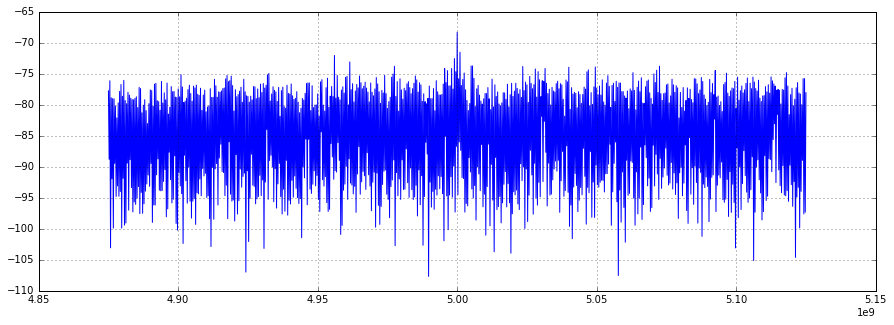

In [284]:
# awg.set_outp1(1)
# awg.set_outp2(1)
exa.prepare_for_stb()
exa.sweep_single()
exa.wait_for_stb()

plt.plot(exa.get_freqpoints(), exa.get_tracedata())

plt.grid()
plt.gcf().set_size_inches(15,5)

In [233]:
awg._visainstrument.query(":SYST:ERR?")

'0,"No error"\n'

In [242]:
awg._visainstrument.write(":FUNC1 SIN; :FREQ1 10e6")

(25, <StatusCode.success: 0>)

In [229]:
awg.apply_waveform(WaveformType.sine, 100e6, 1, 0, 1)

In [227]:
awg.set_1st_delay(0)

True

In [236]:
awg._visainstrument.query(":Freq1?")

'1.00000000000000E+08\n'

In [243]:
awg._visainstrument.query(":FREQ1?")

'1.0000000000000E+07\n'

## Keysight DSO 2014

In [133]:
reload(drivers.Keysight_DSOX2014)

<module 'drivers.Keysight_DSOX2014' from 'C:\\Users\\PAINMASTER\\Measurement\\drivers\\Keysight_DSOX2014.py'>

In [134]:
from drivers.Keysight_DSOX2014 import *

In [4]:
from scipy.integrate import quad

In [135]:
dso = Keysight_DSOX2014("DSO2014")

In [136]:
dso.get_offset(*Channel.ALL)

['-1.750E-03\n', '+0.0E+00\n', '+0.0E+00\n', '+0.0E+00\n']

In [108]:
dso.set_averages(3000)

In [109]:
start = time.time()
dso.digitize()
end = time.time()
print(end - start)

4.321014404296875


In [186]:
dso.get_error()

VisaIOError: VI_ERROR_IO (-1073807298): Could not perform operation because of I/O error.

In [181]:
dso._visainstrument.query(":WAV:points:mode?")

'RAW\n'

In [184]:
dso.set_nop(1e3)
dso.get_nop()

0

In [171]:
dso.set_time_range(100e-6)

In [185]:
dso.digitize()
times, channel_data = dso.get_data(Channel.TWO, Channel.THREE, Channel.FOUR)
axes = flatten(plt.subplots(3,1, sharex=True, figsize=(15,5))[1])
colors = ["g", "b", "violet"]
for idx, ax in enumerate(axes):
    ax.plot(times, channel_data[idx], color=colors[idx])
    ax.grid()
plt.tight_layout()

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [9]:
dso.digitize()
times, channel_data = dso.get_data(Channel.TWO, Channel.THREE, Channel.FOUR)
input_signal, I, Q = channel_data
I_offset = I -(max(I)+min(I))/2
Q_offset = Q-(max(Q)+min(Q))/2
plt.plot(times, I_offset)
plt.plot(times, Q_offset)
plt.gcf().set_size_inches(15,5)
plt.grid()

VisaIOError: VI_ERROR_IO (-1073807298): Could not perform operation because of I/O error.

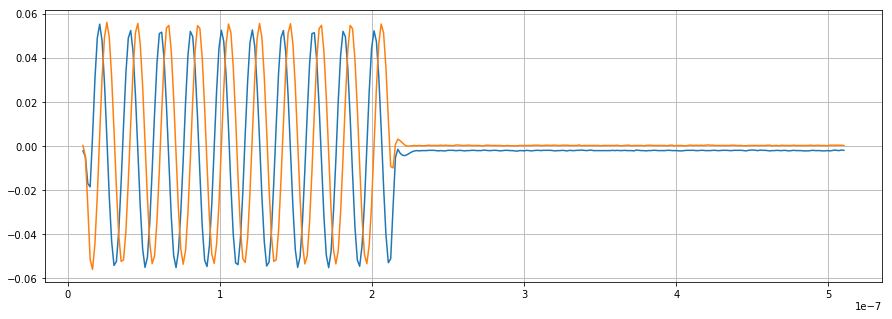

In [695]:
dso.digitize()
times, channel_data = dso.get_data(Channel.TWO, Channel.THREE, Channel.FOUR)
input_signal, I, Q = channel_data
I_offset = I -(max(I)+min(I))/2
Q_offset = Q-(max(Q)+min(Q))/2
plt.plot(times, I_offset)
plt.plot(times, Q_offset)
plt.gcf().set_size_inches(15,5)
plt.grid()

In [694]:
dso.set_time_offset(60e-9)

6e-08

In [675]:
dso.get_time_offset()

5e-08

In [567]:
dso.get_time_range()

2e-06

In [655]:
dso.set_time_range(300e-9)

In [658]:
dso.set_nop(500)

True

In [630]:
dso.get_nop()

99

In [681]:
dso.get_preamble(Channel.THREE)

{'nop': 320,
 'xincrement': 1.5625e-09,
 'xorigin': -4.53125e-08,
 'xreferecnce': 0,
 'yincrement': 7.851759e-06,
 'yorigin': 0.0,
 'yreference': 0}

In [682]:
dso.get_times()

array([ -4.53125000e-08,  -4.37451019e-08,  -4.21777038e-08,
        -4.06103056e-08,  -3.90429075e-08,  -3.74755094e-08,
        -3.59081113e-08,  -3.43407132e-08,  -3.27733150e-08,
        -3.12059169e-08,  -2.96385188e-08,  -2.80711207e-08,
        -2.65037226e-08,  -2.49363245e-08,  -2.33689263e-08,
        -2.18015282e-08,  -2.02341301e-08,  -1.86667320e-08,
        -1.70993339e-08,  -1.55319357e-08,  -1.39645376e-08,
        -1.23971395e-08,  -1.08297414e-08,  -9.26234326e-09,
        -7.69494514e-09,  -6.12754702e-09,  -4.56014890e-09,
        -2.99275078e-09,  -1.42535266e-09,   1.42045455e-10,
         1.70944357e-09,   3.27684169e-09,   4.84423981e-09,
         6.41163793e-09,   7.97903605e-09,   9.54643417e-09,
         1.11138323e-08,   1.26812304e-08,   1.42486285e-08,
         1.58160266e-08,   1.73834248e-08,   1.89508229e-08,
         2.05182210e-08,   2.20856191e-08,   2.36530172e-08,
         2.52204154e-08,   2.67878135e-08,   2.83552116e-08,
         2.99226097e-08,

### Plotting  

In [1]:
%pylab qt5

Populating the interactive namespace from numpy and matplotlib


In [2]:
from time import sleep

In [12]:
for i in range(0,10):
    plt.plot(np.random.random(10))
    plt.pause(0.01)
    sleep(.5)
    

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backend_bases.py:2445: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


In [2]:
exec(open("lib/test_launch_plot.py").read())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backend_bases.py:2445: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


In [40]:
a = plt.pcolormesh(10*np.random.random((10,10)))
plt.colorbar()
plt.gca().set_title("LOL")

In [41]:
plt.gca().clear()

In [21]:
a.set_array(np.random.random((10,10)))

In [36]:
a.colorbar.set_clim(a.get_clim())

AttributeError: 'NoneType' object has no attribute 'set_clim'

In [6]:
import zhinst

In [7]:
from zhinst import utils

ImportError: Module use of python35.dll conflicts with this version of Python.

In [4]:
import platform

In [7]:
from numpy import *

In [8]:
a = [1,2,3]

In [9]:
array(a)

array([1, 2, 3])

In [10]:
_.copy()

array([1, 2, 3])

In [11]:
_.lol is None

AttributeError: 'numpy.ndarray' object has no attribute 'lol'

In [1]:
from importlib import reload

In [2]:
import pyvisa
from lib2.Measurement import *

In [3]:
Meas = Measurement('Test','Test2',[])

OSError: Could not open VISA library:


NameError: name 'Meas' is not defined